In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix1.csv')
df.head()

df.info()
df.shape
df.describe()

df = df.drop_duplicates()
df.isnull().sum()

df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

df['date_added'] = pd.to_datetime(df['date_added'])

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

df['duration_cleaned'] = df['duration'].str.extract('(\d+)').astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-4207265892.py:25: SyntaxWarning: invalid escape sequence '\d'
  df['duration_cleaned'] = df['duration'].str.extract('(\d+)').astype(int)


/tmp/ipython-input-1803304047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['type'], palette='viridis')


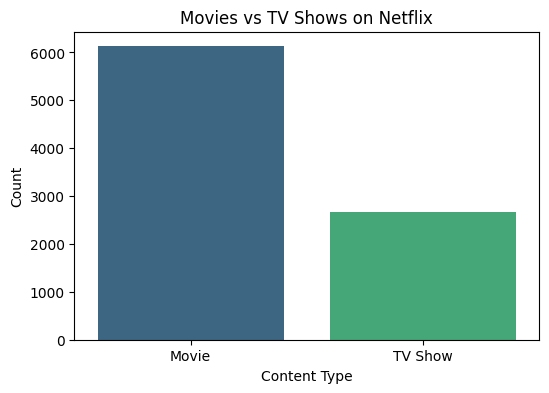

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['type'], palette='viridis')
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()



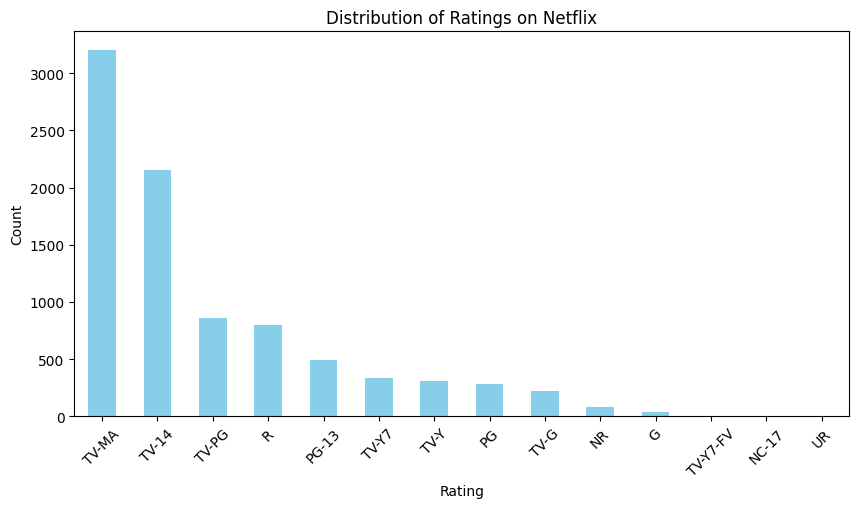

In [9]:
plt.figure(figsize=(10,5))
df['rating'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


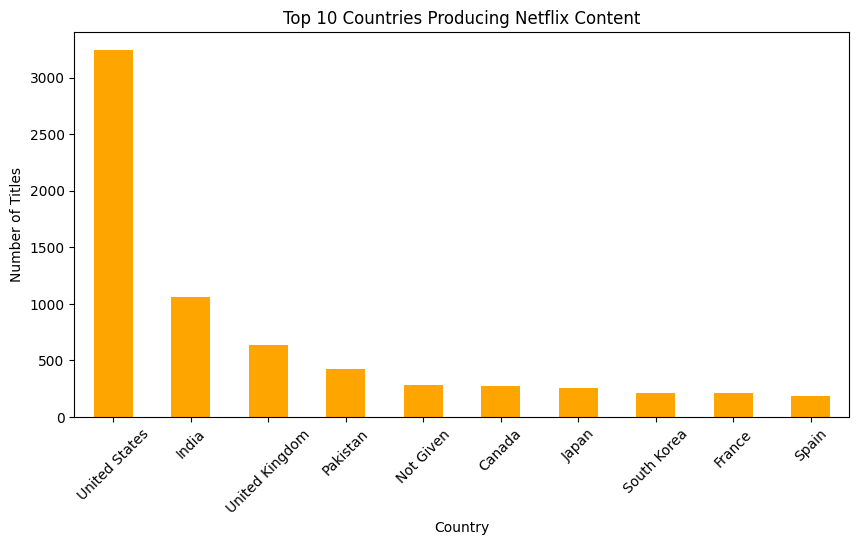

In [10]:
plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


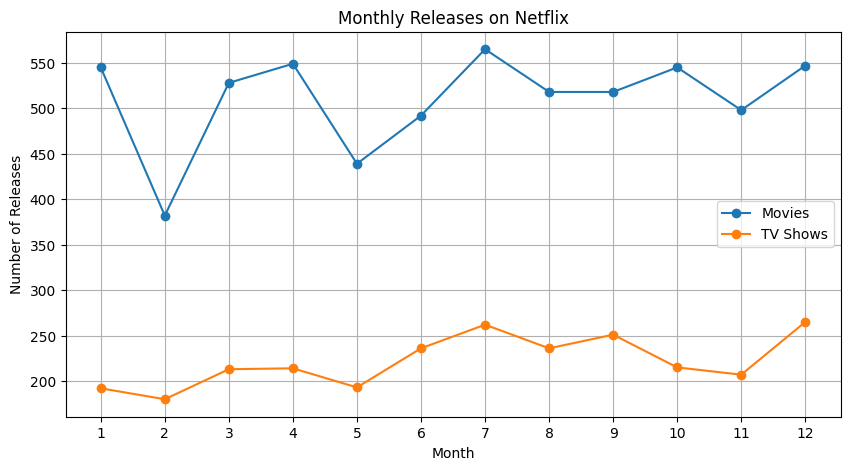

In [11]:
monthly_movies = df[df['type'] == 'Movie']['month_added'].value_counts().sort_index()
monthly_tv = df[df['type'] == 'TV Show']['month_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_movies.index, monthly_movies.values, marker='o', label='Movies')
plt.plot(monthly_tv.index, monthly_tv.values, marker='o', label='TV Shows')
plt.title("Monthly Releases on Netflix")
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.xticks(range(1,13))
plt.legend()
plt.grid(True)
plt.show()


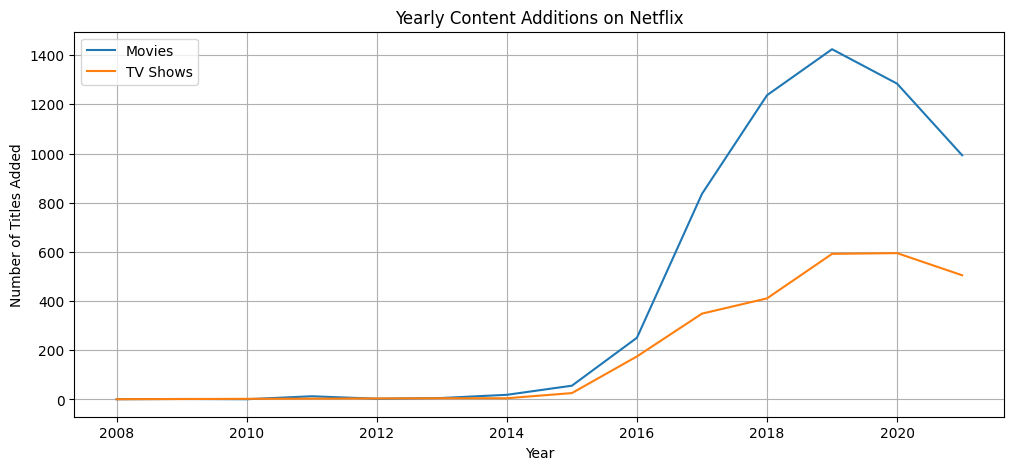

In [12]:
yearly_movies = df[df['type'] == 'Movie']['year_added'].value_counts().sort_index()
yearly_tv = df[df['type'] == 'TV Show']['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,5))
plt.plot(yearly_movies.index, yearly_movies.values, label='Movies')
plt.plot(yearly_tv.index, yearly_tv.values, label='TV Shows')
plt.title("Yearly Content Additions on Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.legend()
plt.show()


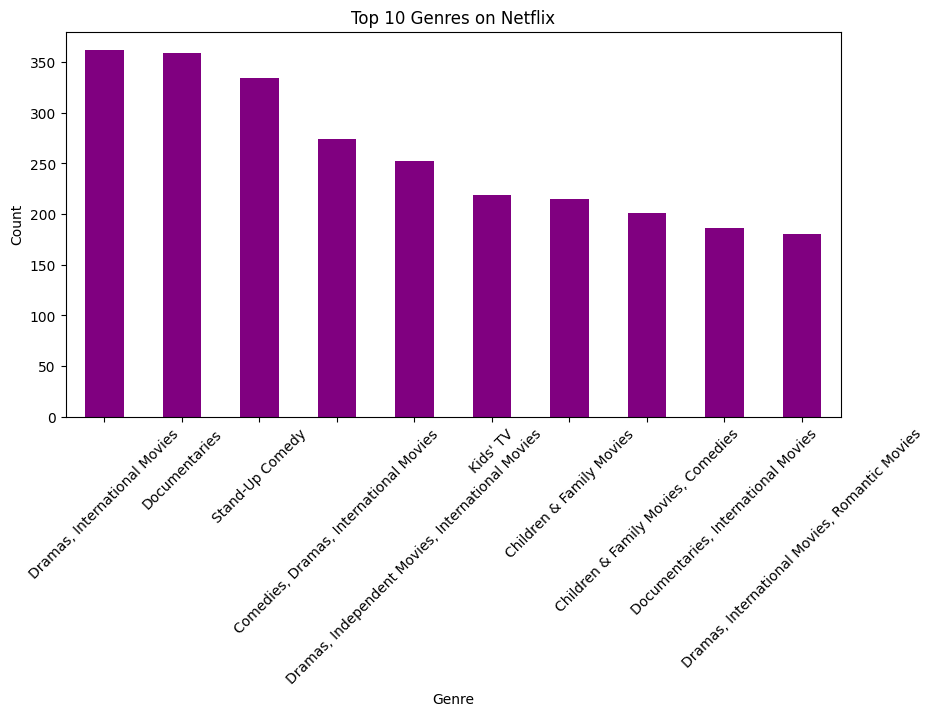

In [13]:
plt.figure(figsize=(10,5))
df['listed_in'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


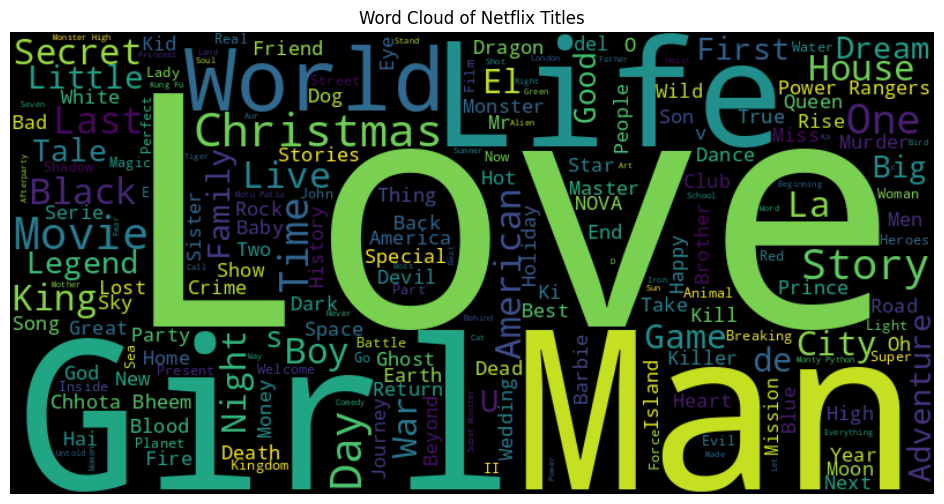

In [14]:
from wordcloud import WordCloud

titles = " ".join(df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Netflix Titles")
plt.show()
